<h3> Assignment

In this assignment students have to make ARIMA model over shampoo sales data and
check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

<b> Since data on above link is not working so I am using stock of 5 years data for REC Ltd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
dfStock = pd.read_csv('RECLTD.NS.csv')

In [3]:
dfStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-12,125.550003,128.699997,125.000000,126.824997,77.992607,4746436.0
1,2014-05-13,129.350006,130.475006,124.000000,128.100006,78.776688,3891000.0
2,2014-05-14,128.024994,135.975006,125.925003,134.375000,82.635567,4714164.0
3,2014-05-15,136.000000,137.949997,134.050003,136.149994,83.727119,6270428.0
4,2014-05-16,140.000000,176.975006,139.350006,145.100006,89.231041,14451382.0


In [4]:
dfStock2 = dfStock[['Date', 'Close']]

In [5]:
dfStock2.set_index('Date', inplace=True)

In [6]:
dfStock2.Close = np.round(dfStock2.Close, 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
dfStock2.head()

,Close
Date,
2014-05-12,127.0
2014-05-13,128.0
2014-05-14,134.0
2014-05-15,136.0
2014-05-16,145.0


In [9]:
from pandas.tools.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(24,8)})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


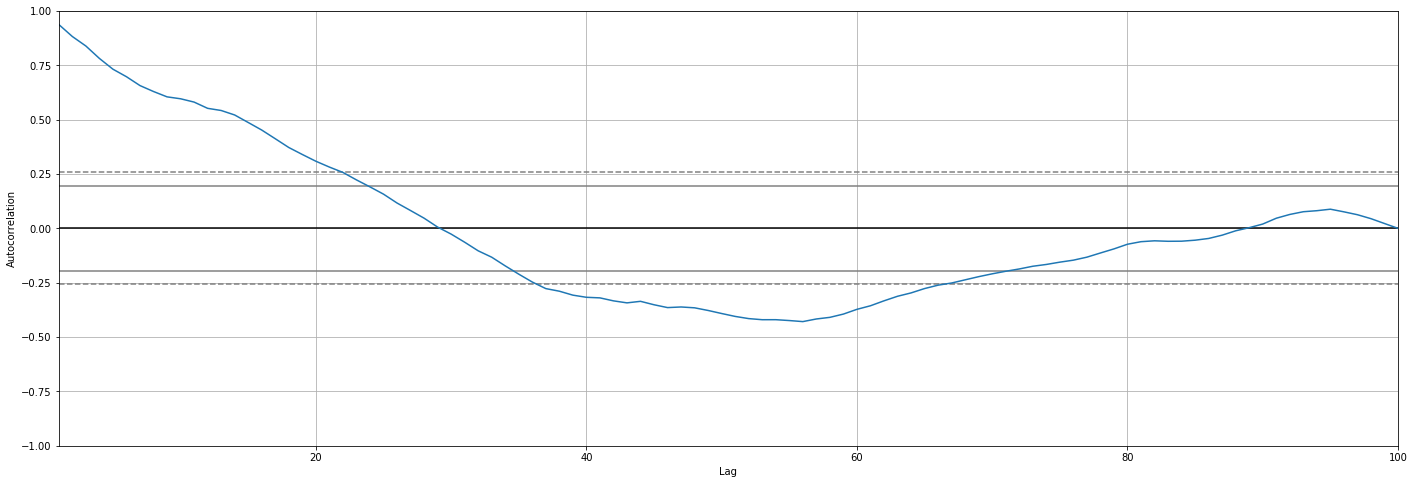

In [9]:
autocorrelation_plot(dfStock2.iloc[0:100])

Above plot only for 100 first values shows that data is a non stationary, lets validate same by using statistical technique as well

In [162]:
adfuller(dfStock2.Close.iloc[:100])

(-0.8225941701486161,
 0.8123949471373949,
 4,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 524.9651545140547)

High p value confirms that it is a non stationary data

<b> 1. Before forecasting for the stock price, lets figure out what would be ideal values of p & q i.e. order of Auto Regression and Moving Average

In [166]:
#First Order differencing
temp = dfStock2 - dfStock2.shift(1)
temp.dropna(inplace=True)

In [154]:
adfuller(temp.Close.iloc[:300])

(-9.434730621215538,
 5.07830000859532e-16,
 3,
 296,
 {'1%': -3.452636878592149,
  '5%': -2.8713543954331433,
  '10%': -2.5719993576515705},
 1588.4692566070366)

This confirms that p can be 1, statistically even with p as 1 data became stationary.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


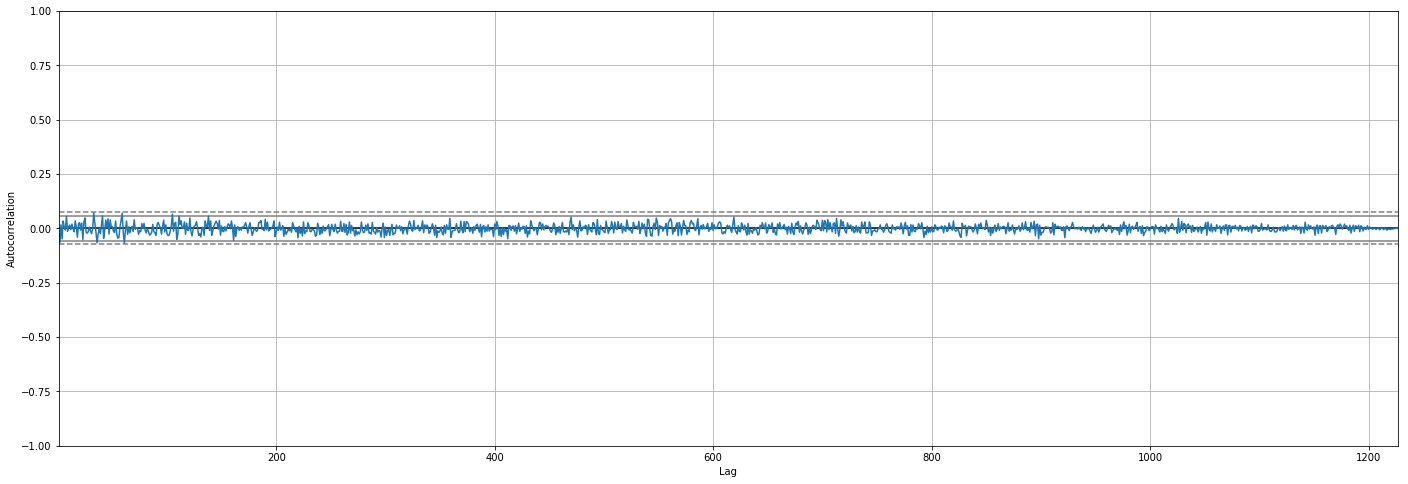

In [167]:
# Correlogram for first order data
autocorrelation_plot(temp)

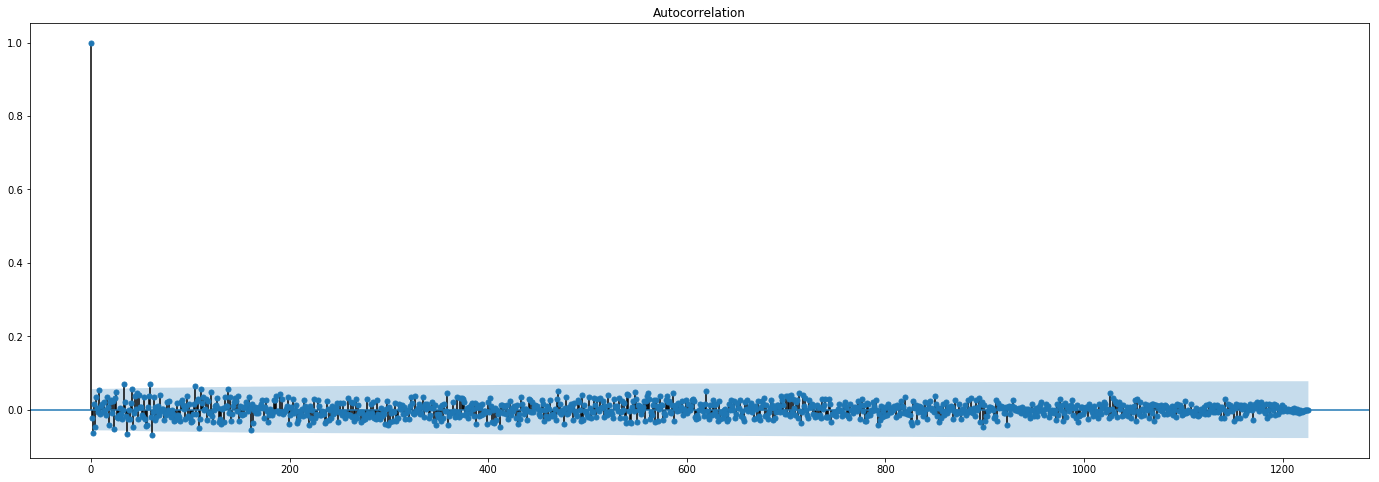

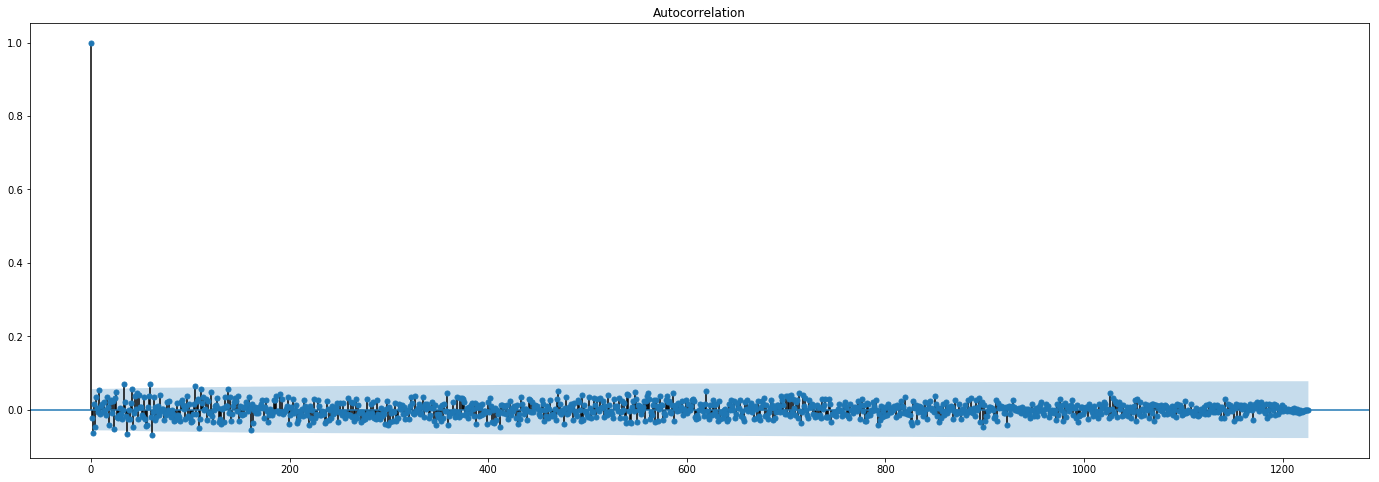

In [155]:
plot_acf(temp)

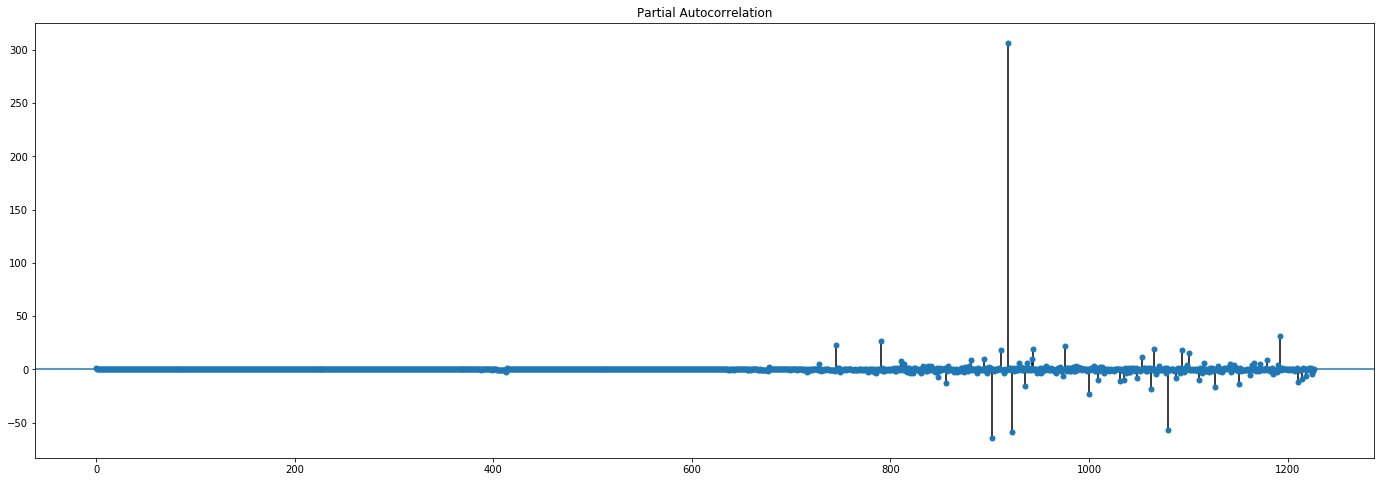

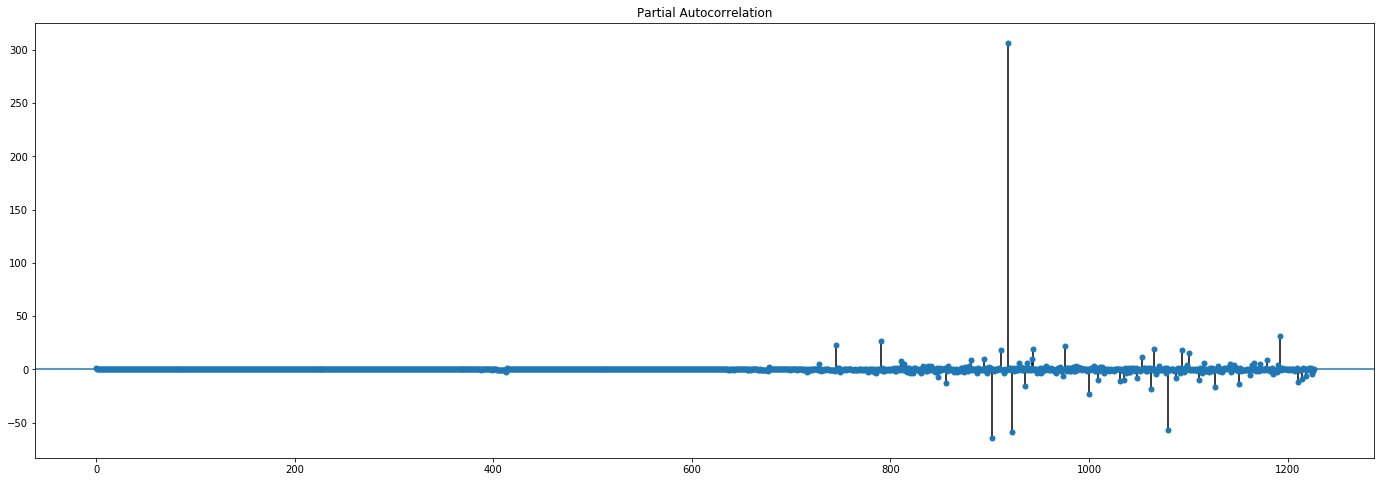

In [11]:
temp = dfStock2 - dfStock2.shift(1)
temp.dropna(inplace=True)
plot_pacf(temp)

<b> Auto correlation graph shows that differencing of 1 has made data stationary but partial auto correlation shows that data is not stationary. So MA order can be 1 and AR order to be greater than 1.

<Figure size 1728x576 with 0 Axes>

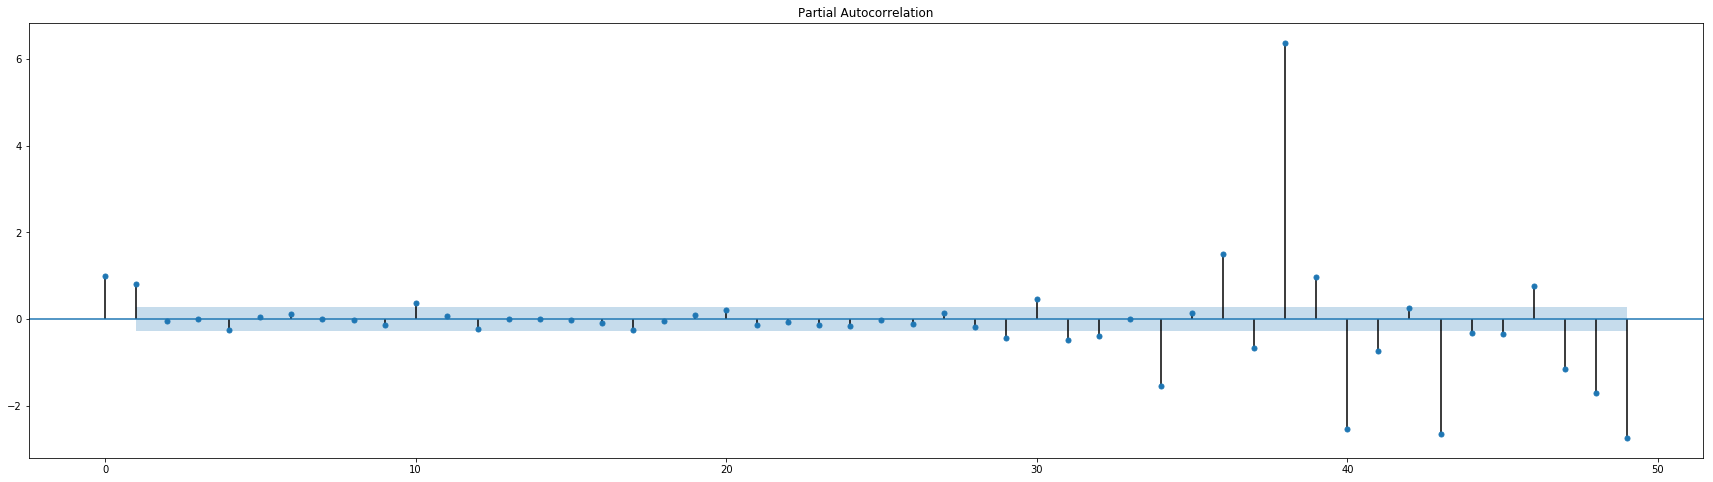

In [15]:
# Value of p for AR
fig = plt.figure()
fig = plot_pacf(dfStock2.iloc[:50])
fig.set_size_inches(30,8)

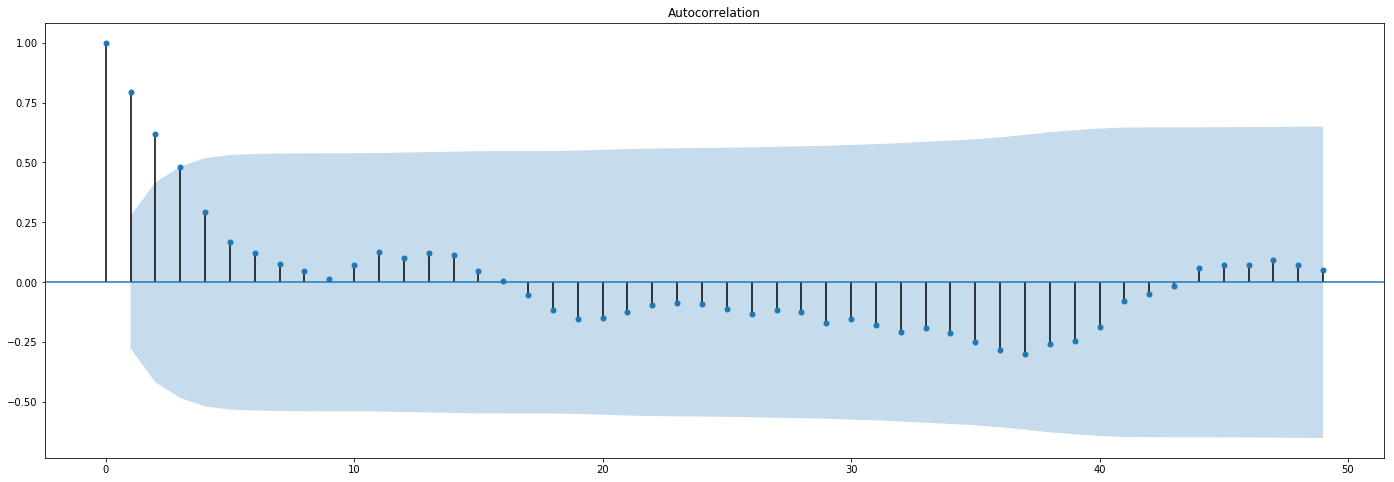

In [84]:
# Value of q for MA
fig = plot_acf(dfStock2.iloc[:50])
fig.set_size_inches(24,8)

<b> From above graphs, acf graph is touching 0 at 2 so p = 1 and pacf graph is touching graph at 9 so q = 8

In [35]:
dfStock2.shape

(1230, 1)

In [36]:
dfStock2.dropna().shape

(1229, 1)

<b> 2. Lets validate all components (seasonality, cyclicity etc) check using seasonal decomposition

<Figure size 1728x576 with 0 Axes>

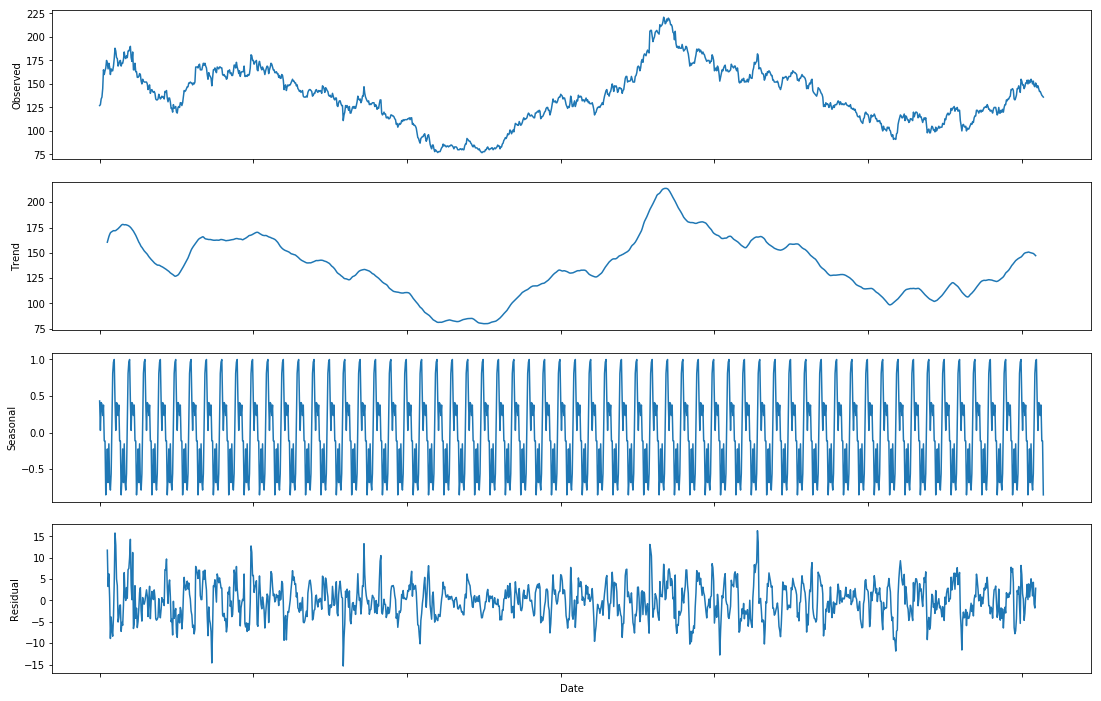

In [23]:
fig = plt.figure()
decompose = seasonal_decompose(dfStock2.dropna(), model='additive', freq=20) # Freq is monthly 20 days
fig = decompose.plot()
fig.set_size_inches(15, 10)

From above it looks like there is a seasonality and trend changing every time but after a short period, either uptrend or downtrend

Lets test with shift 1 and 8

<Figure size 1728x576 with 0 Axes>

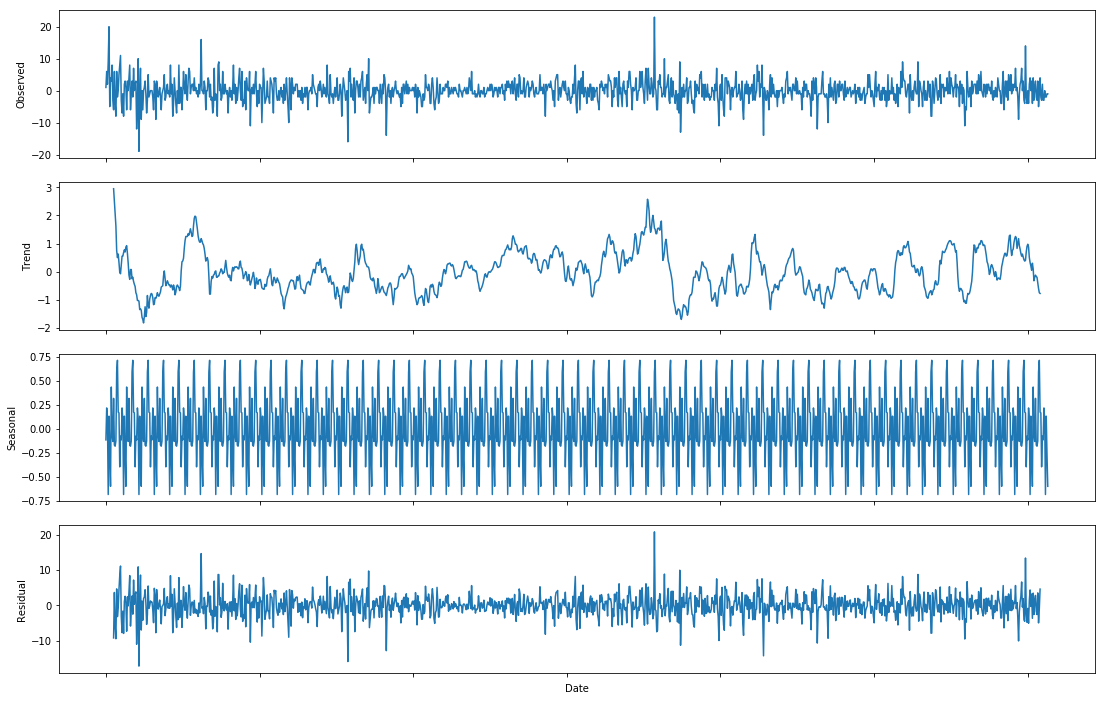

In [13]:
fig = plt.figure()
temp = dfStock2 - dfStock2.shift(1)
decompose = seasonal_decompose(temp.dropna(), model='additive', freq=20) # Freq is monthly 20 days
fig = decompose.plot()
fig.set_size_inches(15, 10)

<Figure size 1728x576 with 0 Axes>

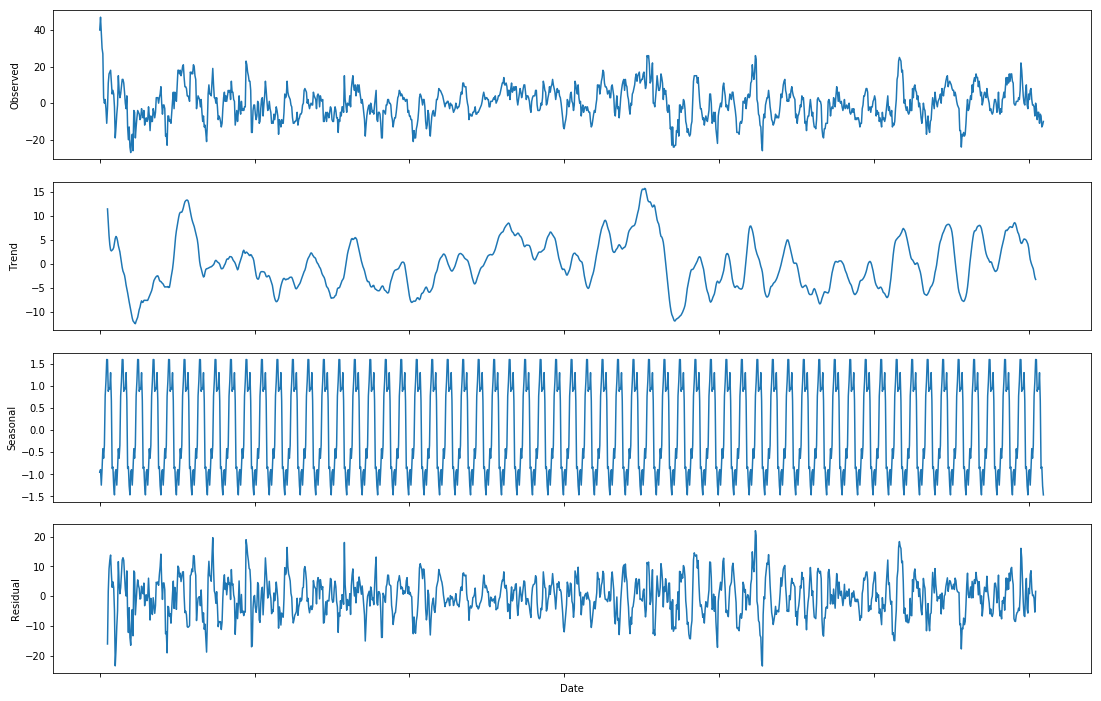

In [14]:
fig = plt.figure()
temp = dfStock2 - dfStock2.shift(8)
decompose = seasonal_decompose(temp.dropna(), model='additive', freq=20) # Freq is monthly 20 days
fig = decompose.plot()
fig.set_size_inches(15, 10)

Statistical test to check if stationary or not

In [20]:
temp = dfStock2 - dfStock2.shift(1)
adfuller(temp.dropna().Close)

(-19.074201985450234,
 0.0,
 3,
 1223,
 {'1%': -3.4357081998138064,
  '5%': -2.863906139614306,
  '10%': -2.568029768447359},
 6354.431119495297)

In [21]:
temp = dfStock2 - dfStock2.shift(8)
adfuller(temp.dropna().Close)

(-6.613498079209057,
 6.290868426889274e-09,
 22,
 1197,
 {'1%': -3.4358248361156765,
  '5%': -2.8639575982634757,
  '10%': -2.5680571735171958},
 6658.398445771849)

<b> p-value is smaller than 0.05 cut off value during both difference of 1 and 8. But seasonal component shows that data is not stationary

<b> 3. Fit the model and predict

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [87]:
splitRatio = int(dfStock2.dropna().shape[0] * 0.5)
train, test = dfStock2.dropna()[0:splitRatio], dfStock2.dropna()[splitRatio:]
history = list(train.Close)
predictedValues = list()

In [88]:
#for i in range(test.shape[0]):
for i in range(200):
    if i==0 or i % 10 == 0:
        model = ARIMA(history[i : train.shape[0] + i - 1], order=(8, 0, 1))
        model_fit = model.fit(disp=0)
        print(i)
    #temp = int(model_fit.forecast()[0][0])
    temp = model_fit.predict(start=i+1, end=i+1)
    predictedValues.append(temp)
    history.append(test.iloc[i])

0
10
20
30


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


40
50
60
70
80
90
100


LinAlgError: SVD did not converge

In [89]:
print(len(test))
print(len(predictedValues))

615
110


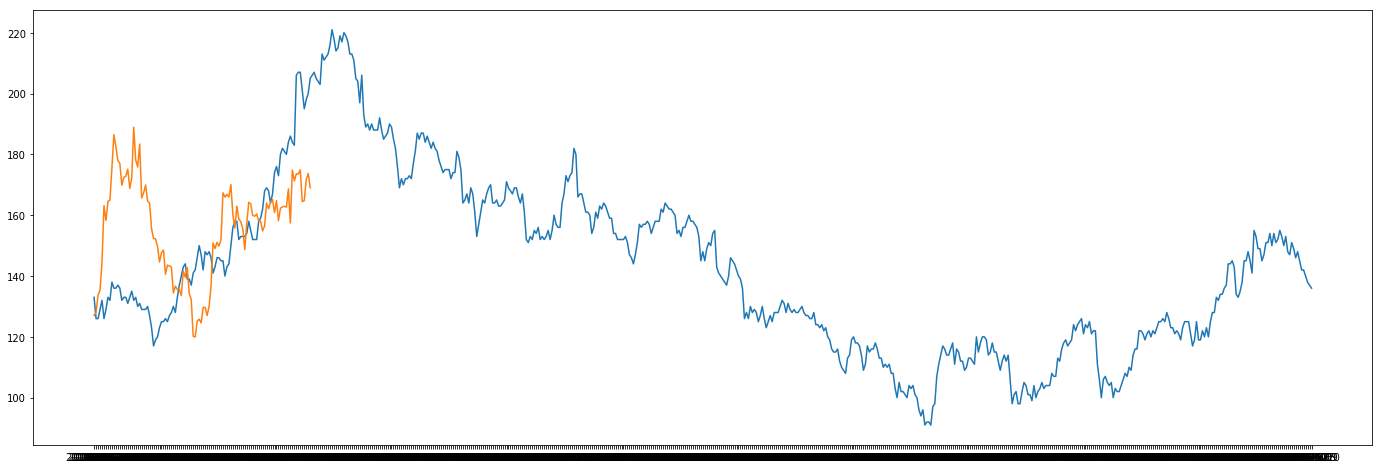

In [90]:
plt.plot(test)
plt.plot(predictedValues)
plt.show()

In [91]:
np.sqrt(mean_squared_error(predictedValues, test.iloc[:110]))

24.51170277853552

<b> Even though training of the model has failed but mean error for the predicted 120 values is high i.e. 24